In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
im1=cv2.imread("./photos/tab1.png") #./tab1.png
im2=cv2.imread("./photos/tab1h7.png") #./tab1h7.png

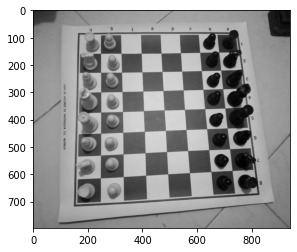

In [3]:
#imagen1 en escala de grises
prev_frame=cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
plt.imshow(prev_frame,cmap="gray")

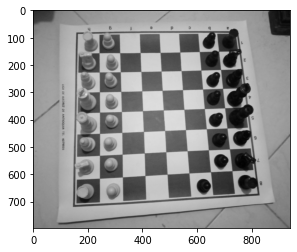

In [4]:
# imagen 2 en escala de grises (movimiento de peón negro de casilla verde a blanca)
frame=cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)
plt.imshow(frame,cmap="gray")

In [5]:
prev_blur = cv2.blur(prev_frame, (33, 33), 1)
blur = cv2.blur(frame, (33, 33), 1)

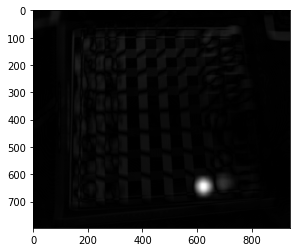

In [6]:
diff = cv2.absdiff(prev_blur, blur)
plt.imshow(diff, cmap='gray')

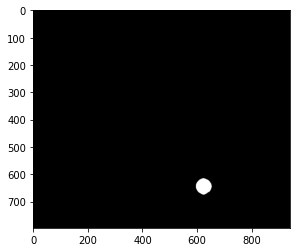

In [7]:
h, thresh = cv2.threshold(diff, 50, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

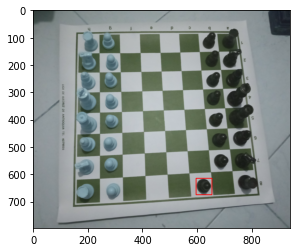

In [8]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour = max(contours, key = lambda x: cv2.contourArea(x))
(x, y, w, h) = cv2.boundingRect(contour) # Obtiene las coordenadas del contorno
cv2.rectangle(im2, (x, y), (x+w, y+h), (255, 0, 0), 2) # Dibuja el rectangulo

plt.imshow(im2)

In [9]:
im1=cv2.imread("./photos/tab1.png") #./tab1.png
im2=cv2.imread("./photos/tab1h7.png") #./tab1h7.png

In [10]:
prev_frame=cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
frame=cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)
prev_blur = cv2.blur(prev_frame, (33, 33), 1)
blur = cv2.blur(frame, (33, 33), 1)

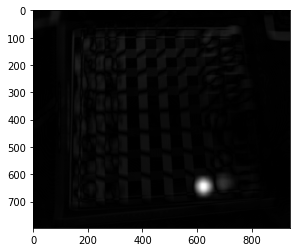

In [11]:
diff = cv2.absdiff(prev_blur, blur)
plt.imshow(diff, cmap='gray')

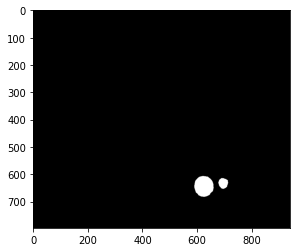

In [12]:
h, thresh = cv2.threshold(diff, 20, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

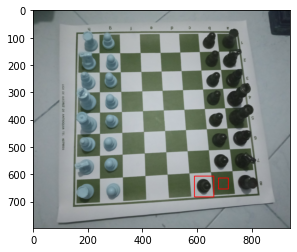

In [13]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    (x, y, w, h) = cv2.boundingRect(contour) # Obtiene las coordenadas del contorno

    #Discrimina el dibujo de rectangulos cuando el movimiento es muy pequeño
    if cv2.contourArea(contour) < 10:
        continue
    cv2.rectangle(im2, (x, y), (x+w, y+h), (255, 0, 0), 2) # Dibuja el rectangulo
    
plt.imshow(im2)

In [14]:
frame=cv2.imread("./photos/tab1.png") #./tab1.png
same_frame=cv2.imread("./photos/tab1.png") #./tab1h7.png

In [15]:
prev_frame=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
frame=cv2.cvtColor(same_frame,cv2.COLOR_BGR2GRAY)
prev_blur = cv2.blur(prev_frame, (33, 33), 1)
blur = cv2.blur(frame, (33, 33), 1)

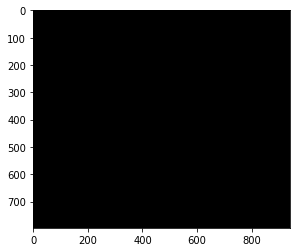

In [16]:
diff = cv2.absdiff(prev_blur, blur)
h, thresh = cv2.threshold(diff, 20, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

In [18]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
movement = True
if len(contours) == 0:
    movement = False

print(f'movement: {movement}')

movement: False
